## 천안시_월별 지역별 업종별 매출규모
[목차]
1. 데이터 로드  
2. 업종 별  
    (1) 업종 별 이용금액 합계  
    (2) 기준연월 제과점 및 그 외 업종 비율 비교  
    (3) 기준연월 별 제과점 비율 시각화  
3. (제과점) 월별 이용건수, 이용금액
4. 연도별 전체업종 대비 제과점 매출 비율

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 1. 데이터 로드

In [3]:
df = pd.read_csv('./천안시_BC카드_월별 지역별 업종별 매출규모별 소비 데이터.csv', encoding='cp949')

In [4]:
df.head(1)

,기준연월,시도명,시군구명,행정동명,행정동코드,업종코드,업종명,가맹점매출규모,이용건수(전체합계),이용금액(전체합계),...,18_20시간대이용금액,21_23시간대이용금액,충청남도고객이용건수,충청남도외고객이용건수,충청남도고객이용금액,충청남도외고객이용금액,내국인이용건수,외국인이용건수,내국인이용금액,외국인이용금액
0,201901,충청남도,천안시 동남구,광덕면,44131320,1199,기타교통수단,A,4,653000,...,6000,0,NaN,NaN,640000,13000,4.0,0.0,653000,0


In [5]:
df.기준연월.unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204,
       202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212,
       202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308,
       202309, 202310, 202311, 202402, 202403, 202404, 202405],
      dtype=int64)

In [6]:
df['기준_년'] = df['기준연월'] // 100  
df['기준_월'] = df['기준연월'] % 100     

In [7]:
df.head(1)

,기준연월,시도명,시군구명,행정동명,행정동코드,업종코드,업종명,가맹점매출규모,이용건수(전체합계),이용금액(전체합계),...,충청남도고객이용건수,충청남도외고객이용건수,충청남도고객이용금액,충청남도외고객이용금액,내국인이용건수,외국인이용건수,내국인이용금액,외국인이용금액,기준_년,기준_월
0,201901,충청남도,천안시 동남구,광덕면,44131320,1199,기타교통수단,A,4,653000,...,NaN,NaN,640000,13000,4.0,0.0,653000,0,2019,1


### 2. 업종 별
#### (1) 업종 별 이용금액 합계

In [8]:
df_m = df.groupby(['업종명'])['이용금액(전체합계)'].sum().reset_index()
df_m.sort_values(by='이용금액(전체합계)', ascending=False)

,업종명,이용금액(전체합계)
142,일반한식,926238876088
162,주유소,784987132936
104,슈퍼마켓,342963208542
187,편의점,334032869624
62,대형할인점,315651272860
...,...,...
78,보관창고업,12700380
118,양품점,11566000
88,사무서비스(회원제형태),10040000
11,골동품점,5975000


In [9]:
# 제과점 매출순위 17위
t = df.groupby(['업종명'])['이용금액(전체합계)'].sum().reset_index()
t = t.sort_values(by='이용금액(전체합계)', ascending=False).reset_index()
t[t['업종명']=='제과점']

,index,업종명,이용금액(전체합계)
16,152,제과점,82501697913


In [10]:
total = df_m['이용금액(전체합계)'].sum()
df_m['ratio'] = (df_m['이용금액(전체합계)'] / total) * 100
df_m

,업종명,이용금액(전체합계),ratio
0,1급호텔,20785729213,0.322314
1,2급호텔,968156691,0.015013
2,DVD음반테이프판매,182426523,0.002829
3,LPG,37953480848,0.588525
4,가례서비스,14370623791,0.222838
...,...,...,...
198,화랑,511987160,0.007939
199,화물운송,8162039013,0.126565
200,화방표구점,544617319,0.008445
201,화원,8956179023,0.138879


In [11]:
# 제과점과 그 외 업종
bakery_ratio = df_m[df_m['업종명'] == '제과점']['이용금액(전체합계)'].sum() / total * 100
other_ratio = df_m[df_m['업종명'] != '제과점']['이용금액(전체합계)'].sum() / total * 100

df_result = pd.DataFrame({
    '업종명': ['제과점', '기타'],
    'ratio': [bakery_ratio, other_ratio]
})
df_result

,업종명,ratio
0,제과점,1.279312
1,기타,98.720688


#### (2) 기준연월 별 제과점 및 그 외 업종 비율 비교

In [12]:
grouped = df.groupby(['기준연월', '업종명'])['이용금액(전체합계)'].sum().reset_index()

# 기준연월 별 전체 이용금액 합계 계산
total_by_year = grouped.groupby('기준연월')['이용금액(전체합계)'].sum().reset_index()
total_by_year.rename(columns={'이용금액(전체합계)': 'total'}, inplace=True)

# 원본 데이터에 기준연월 별 전체 이용금액 합계를 병합
merged = pd.merge(grouped, total_by_year, on='기준연월')

# 비율 계산
merged['ratio'] = (merged['이용금액(전체합계)'] / merged['total']) * 100

# 제과점과 그 외로 나누기
bakery = merged[merged['업종명'] == '제과점']
other = merged[merged['업종명'] != '제과점']

# 기준연월 별 제과점과 그 외 비율을 계산
bakery_ratio = bakery.groupby('기준연월')['ratio'].sum().reset_index()
other_ratio = other.groupby('기준연월')['ratio'].sum().reset_index()

# 결과 데이터프레임 생성
bakery_ratio['업종명'] = '제과점'
other_ratio['업종명'] = '기타'

# 두 결과를 합쳐서 최종 데이터프레임 생성
df_result = pd.concat([bakery_ratio, other_ratio])

# 결과 확인
df_result

,기준연월,ratio,업종명
0,201901,1.217437,제과점
1,201902,1.372139,제과점
2,201903,1.319398,제과점
3,201904,1.298282,제과점
4,201905,1.258384,제과점
...,...,...,...
58,202311,98.755399,기타
59,202402,98.581117,기타
60,202403,98.613742,기타
61,202404,98.683781,기타


#### (3) 기준연월 별 제과점 비율 시각화

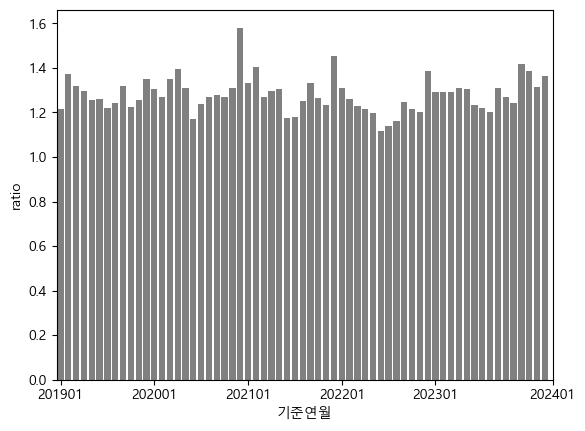

In [13]:
# 제과점 비율 막대 그래프
df_bread = df_result[df_result['업종명']=='제과점']
sns.barplot(data=df_bread, x='기준연월', y='ratio', color='gray')

# x축
plt.xticks(ticks=['201901', '202001', '202101', '202201', '202301', '202401'])

# y축
from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

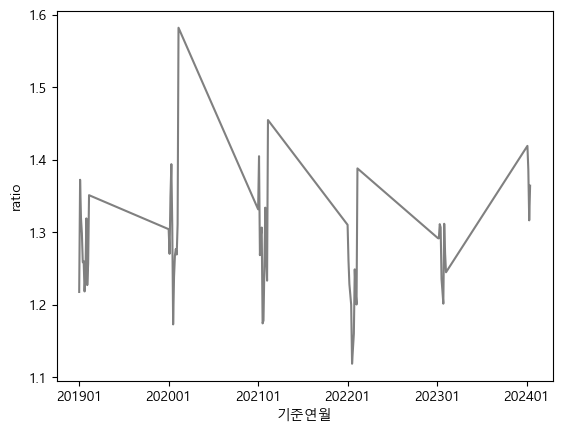

In [14]:
# 제과점 비율 막대 그래프
df_bread = df_result[df_result['업종명']=='제과점']
sns.lineplot(data=df_bread, x='기준연월', y='ratio', color='gray')

# x축
plt.xticks(ticks=[201901, 202001, 202101, 202201, 202301, 202401])

# y축
#from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [15]:
df_bread.sort_values(by='ratio', ascending=False).head(10)

,기준연월,ratio,업종명
23,202012,1.581793,제과점
35,202112,1.454519,제과점
59,202402,1.418883,제과점
25,202102,1.404648,제과점
15,202004,1.393683,제과점
47,202212,1.387844,제과점
60,202403,1.386258,제과점
1,201902,1.372139,제과점
62,202405,1.364012,제과점
11,201912,1.350903,제과점


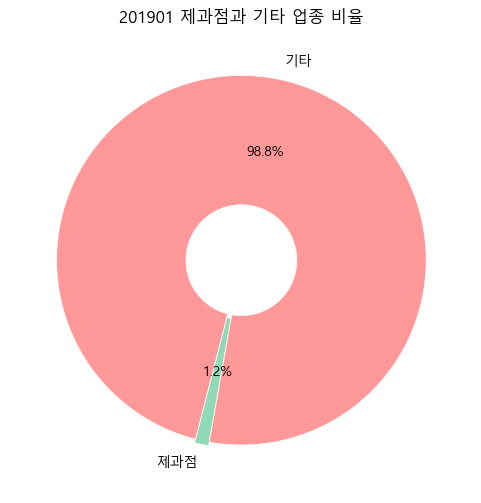

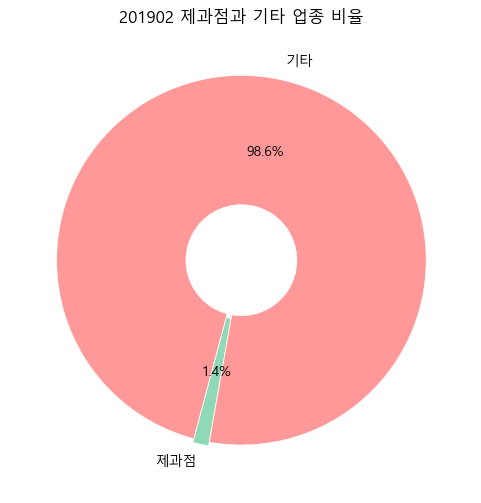

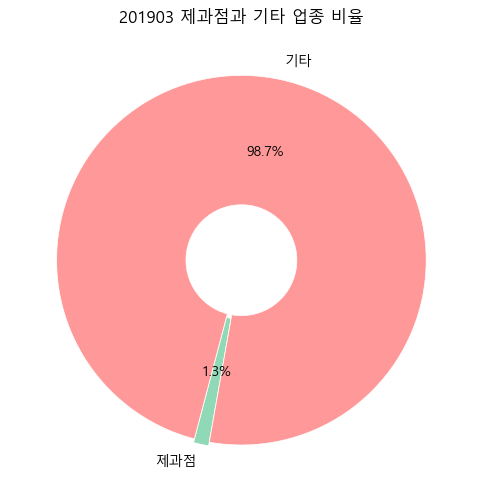

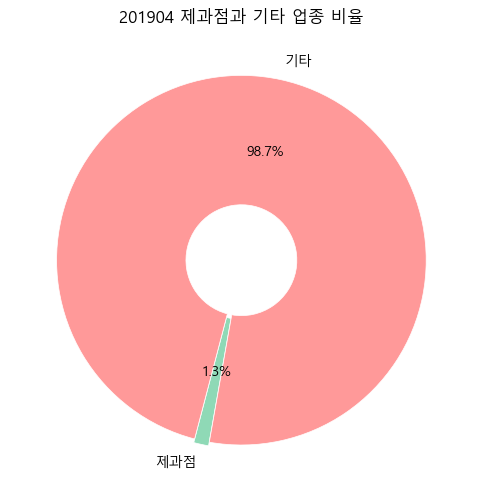

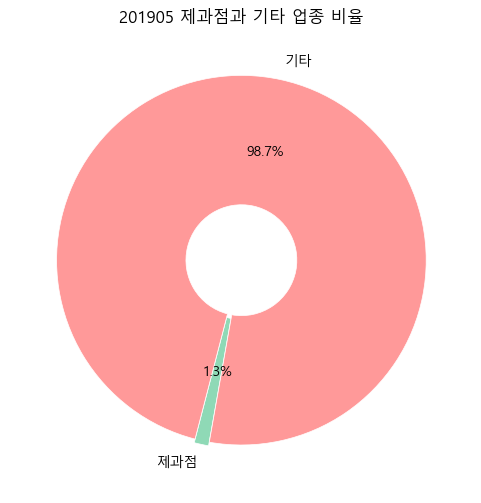

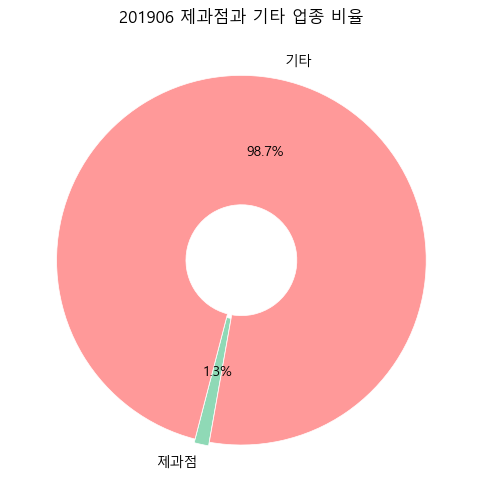

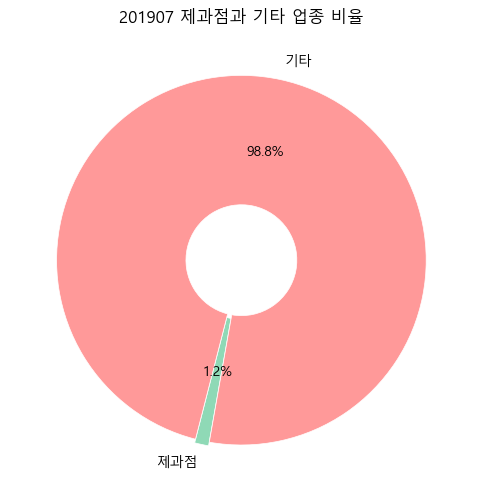

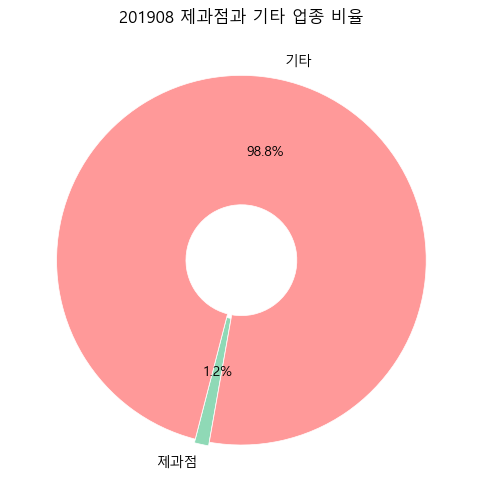

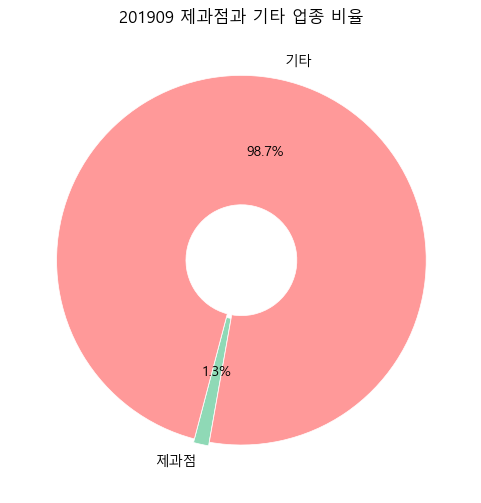

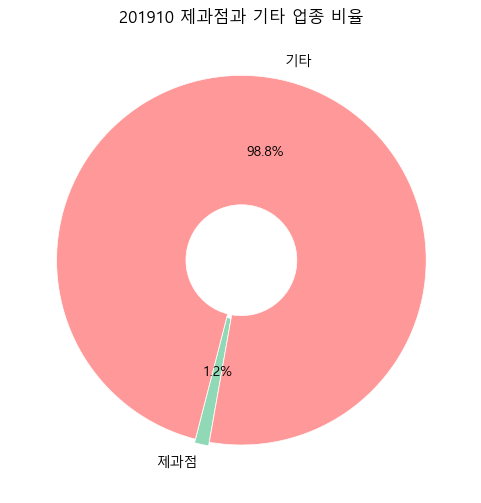

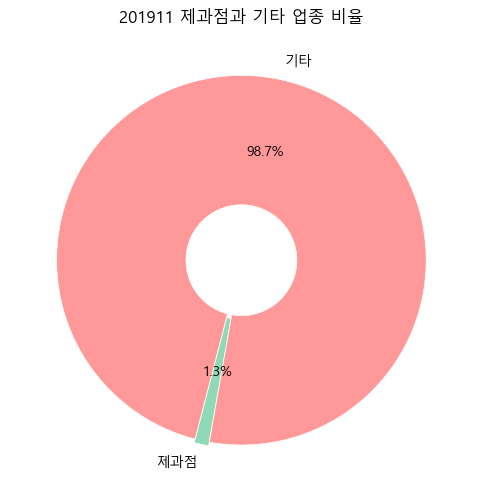

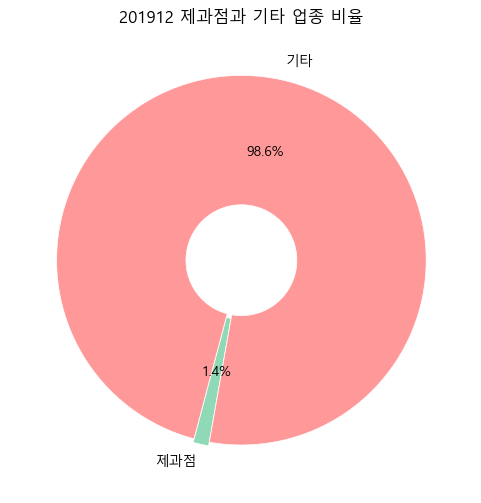

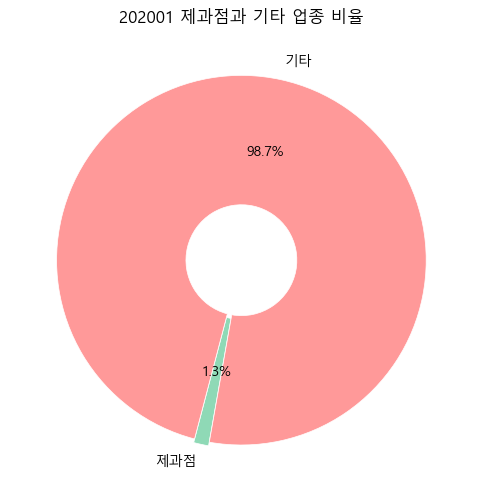

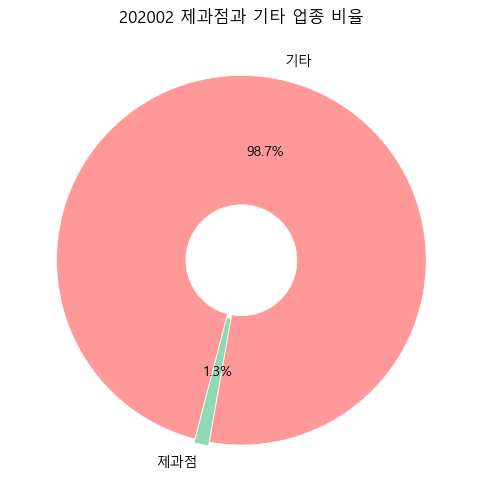

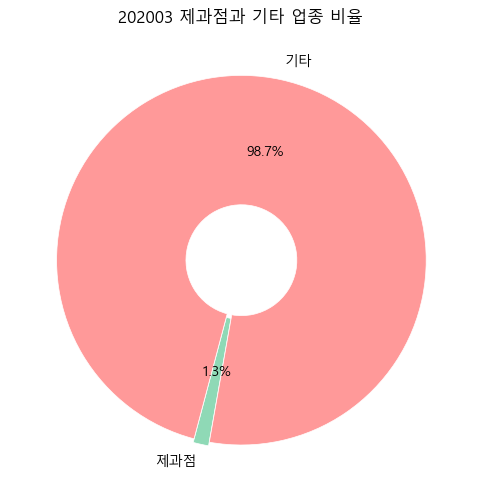

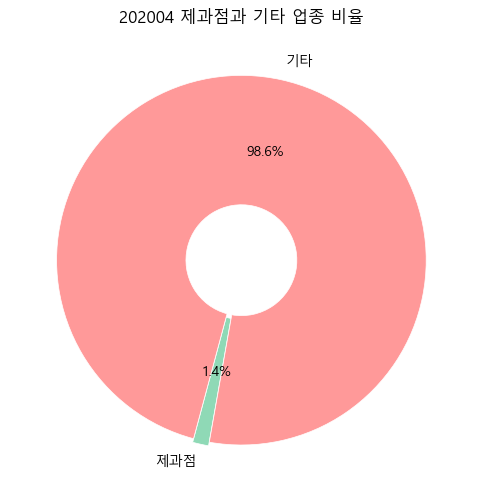

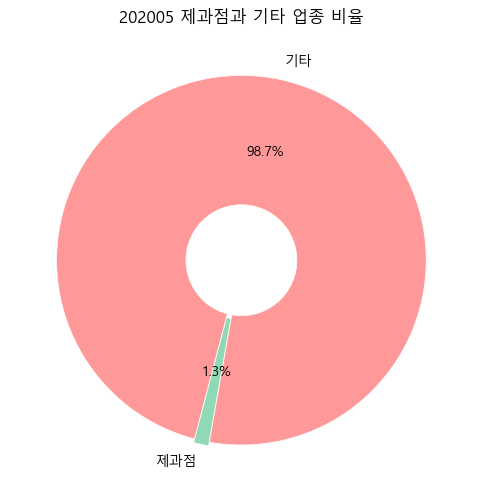

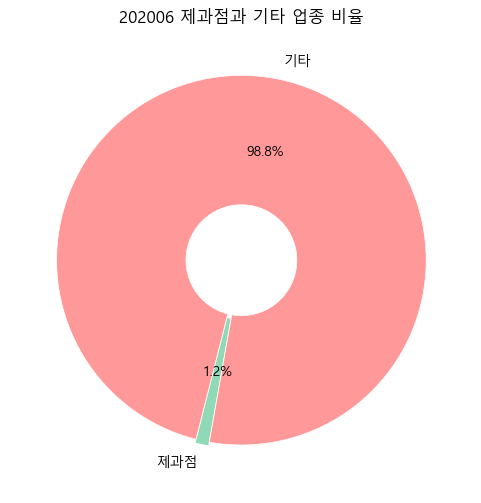

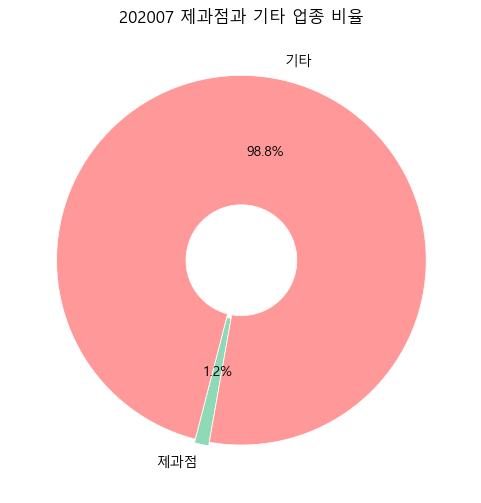

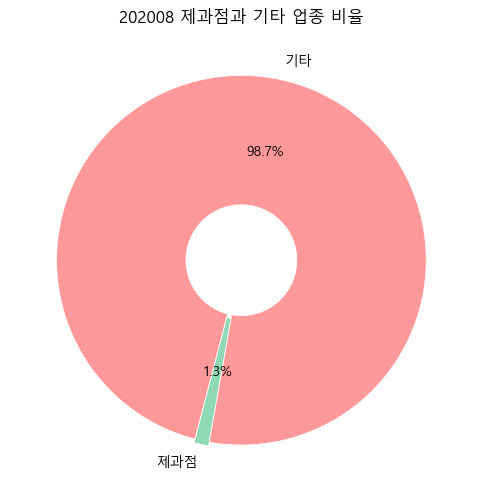

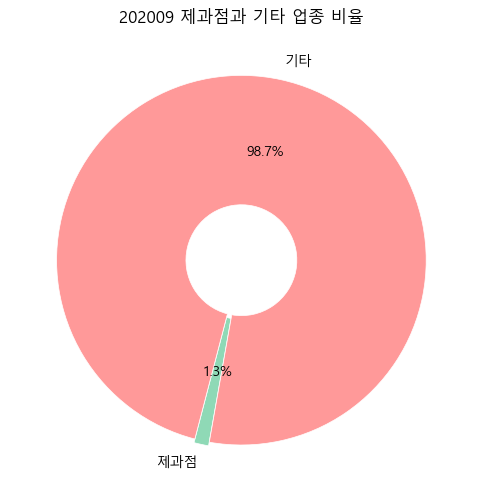

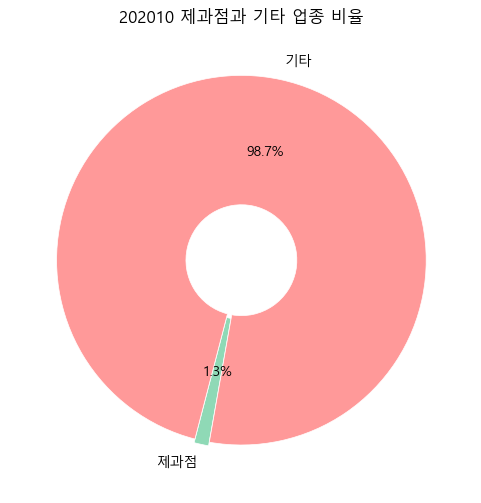

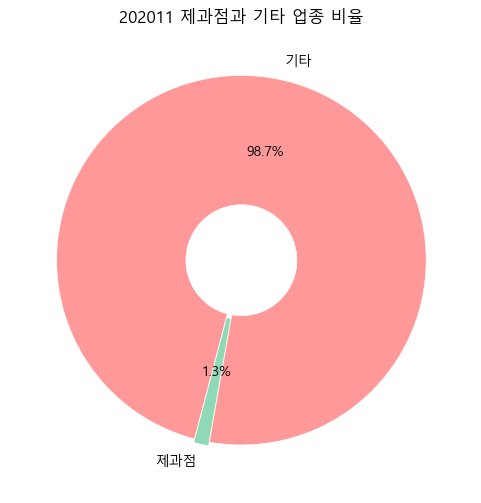

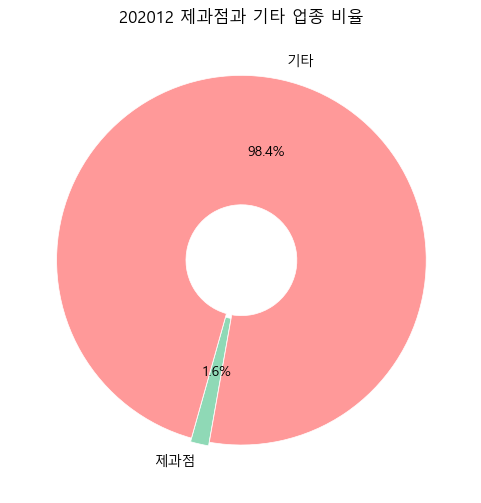

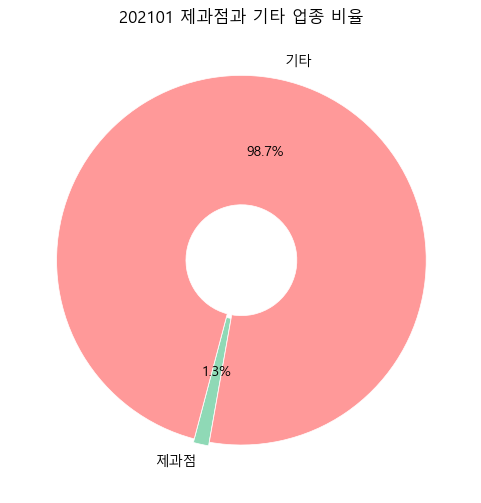

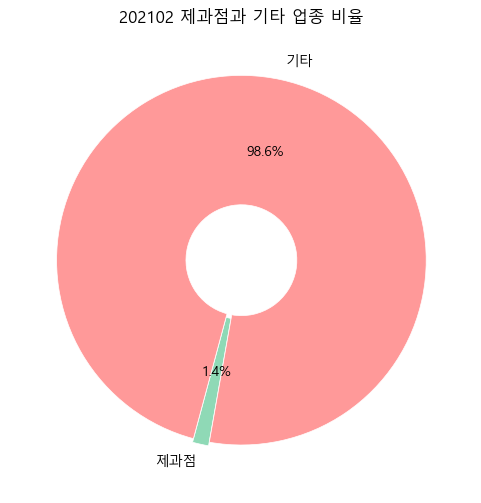

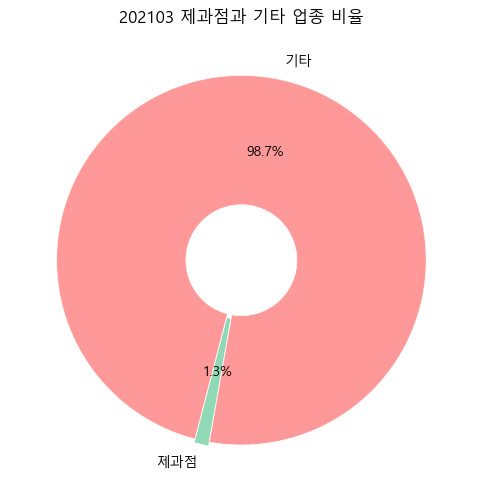

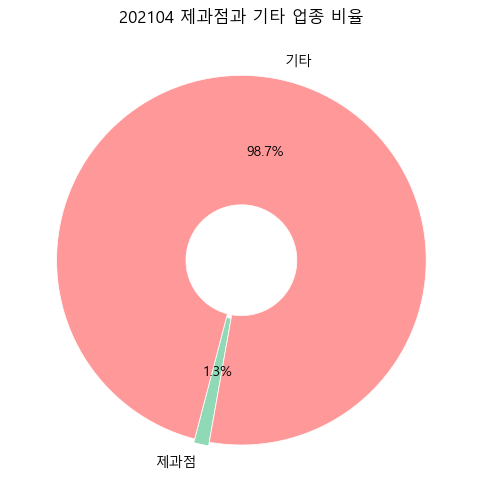

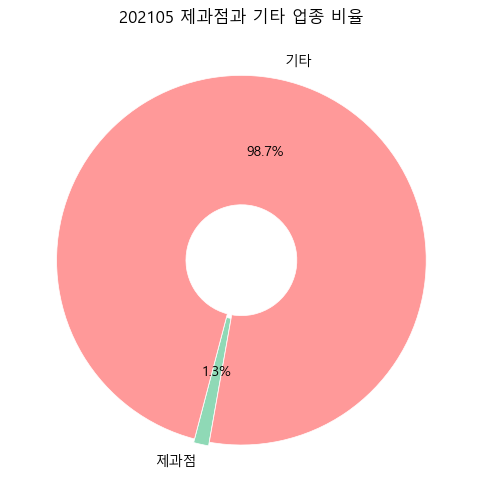

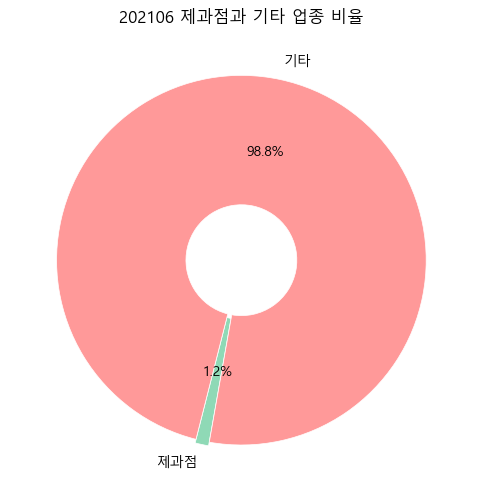

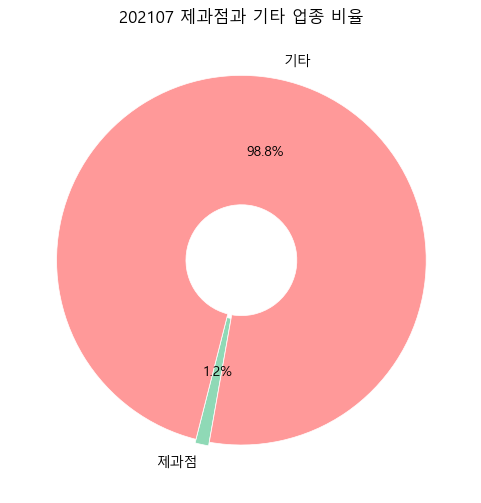

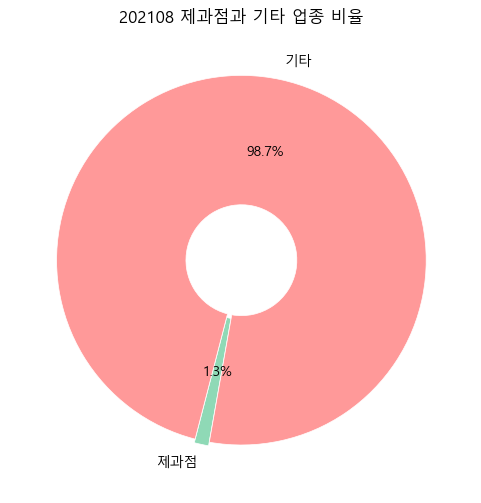

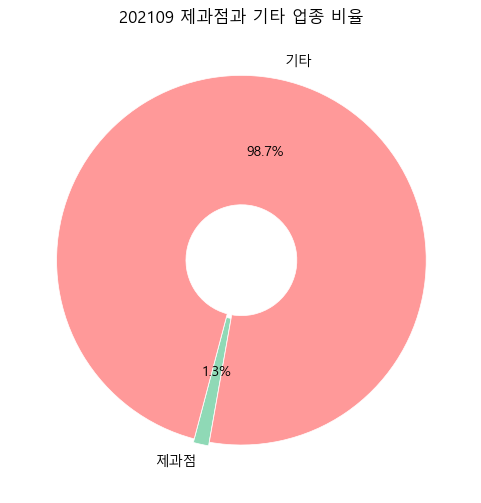

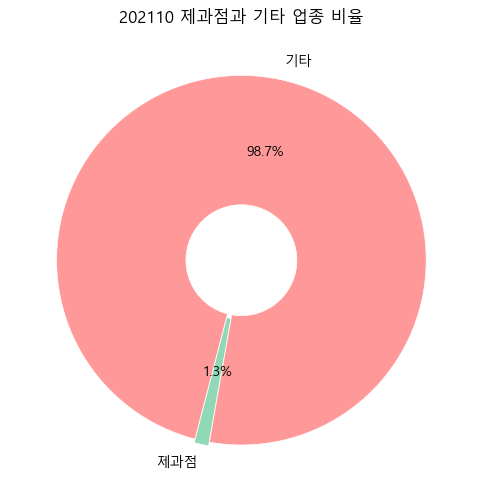

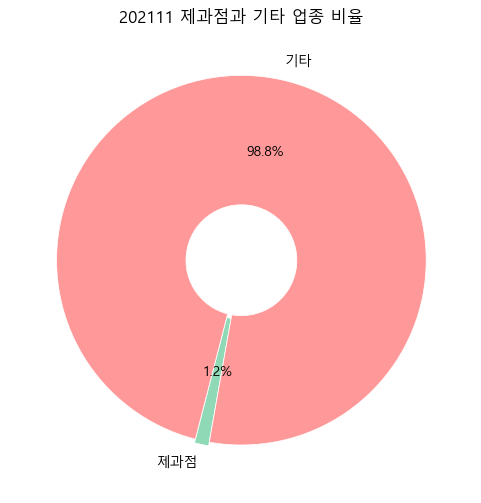

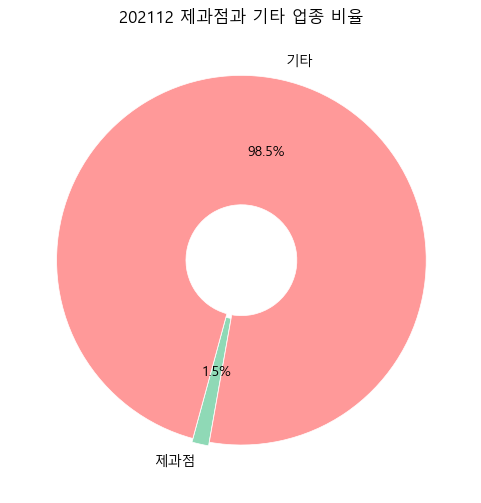

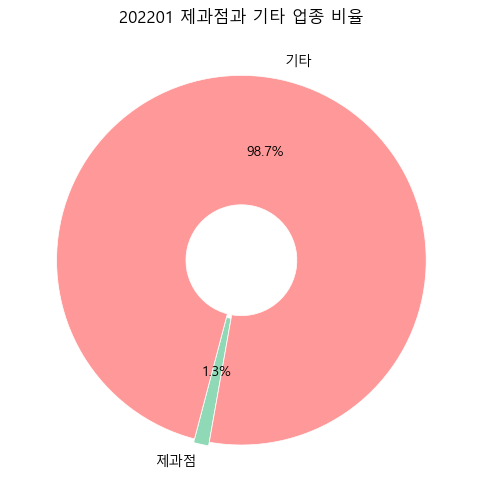

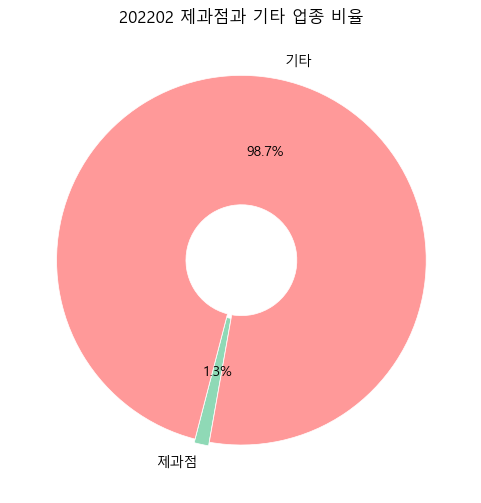

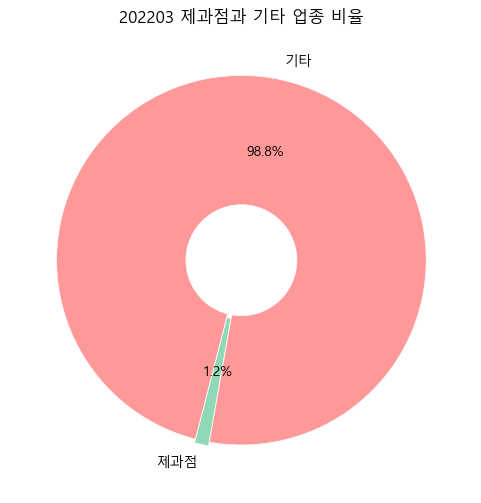

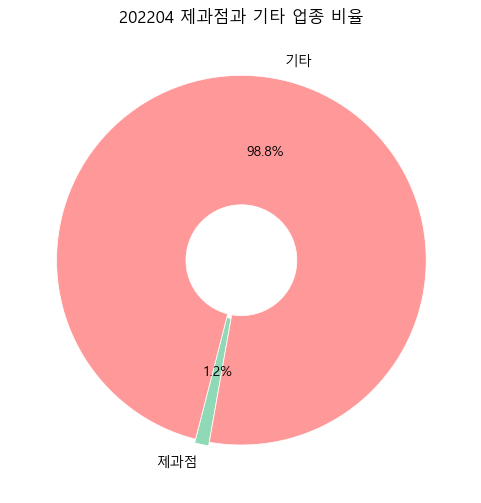

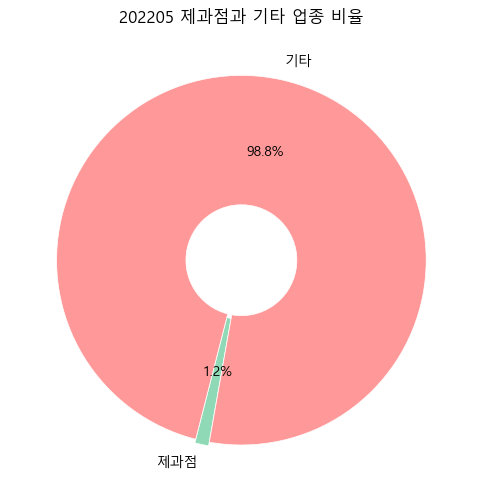

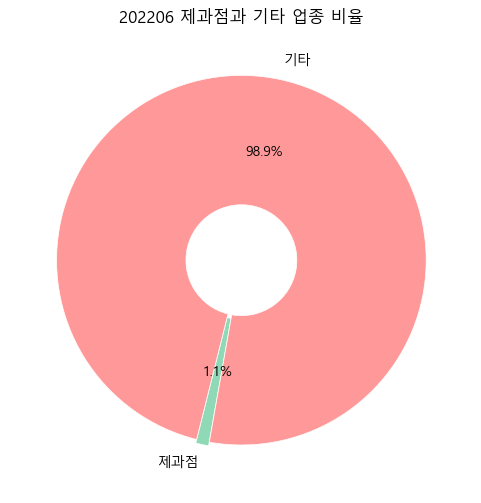

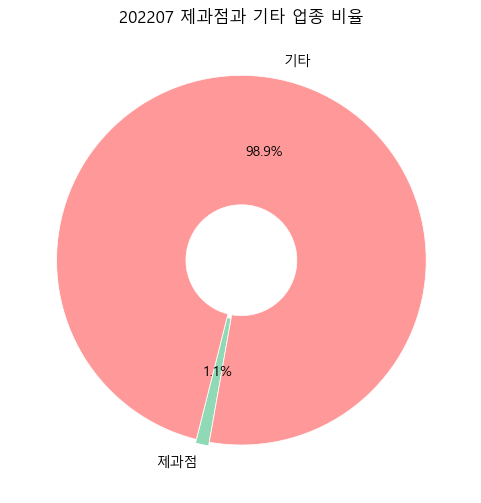

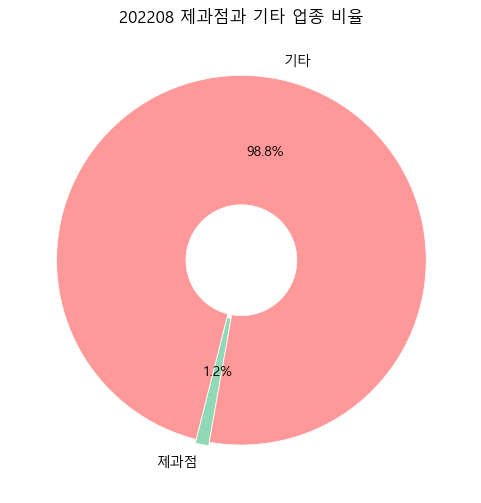

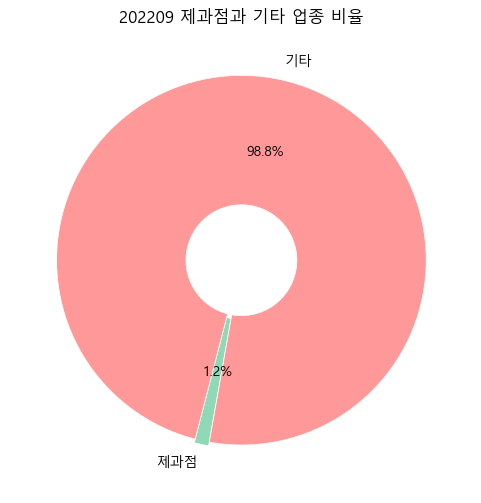

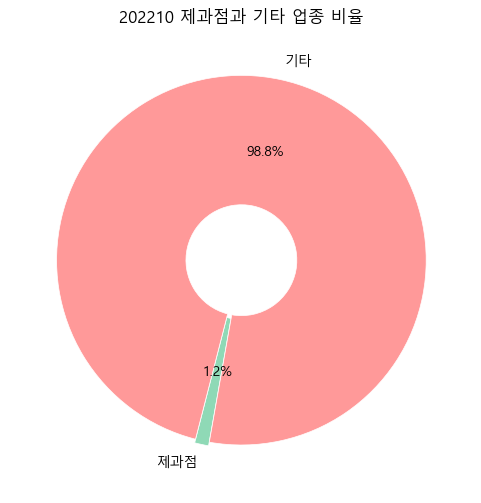

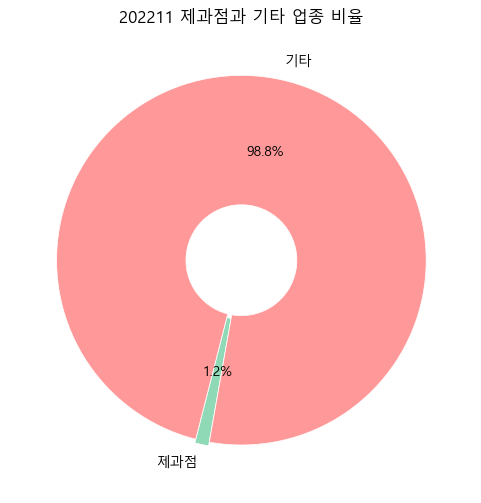

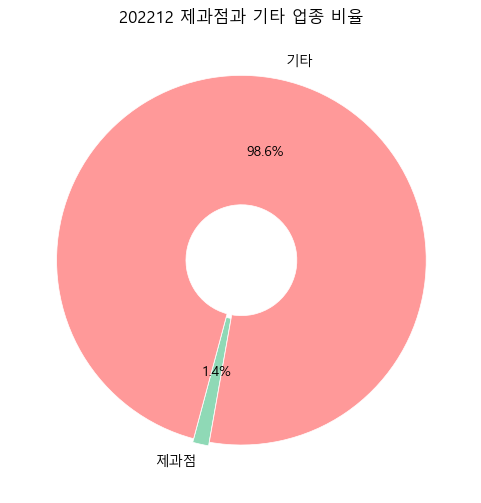

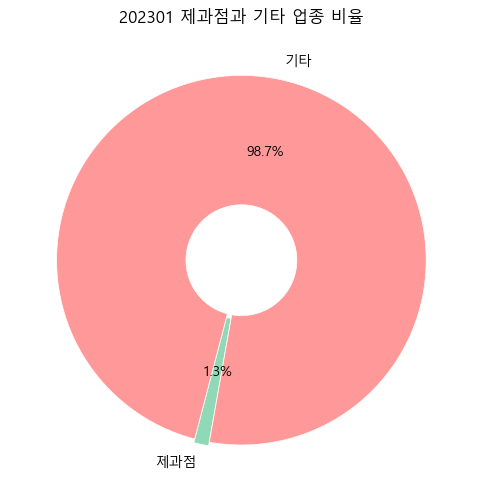

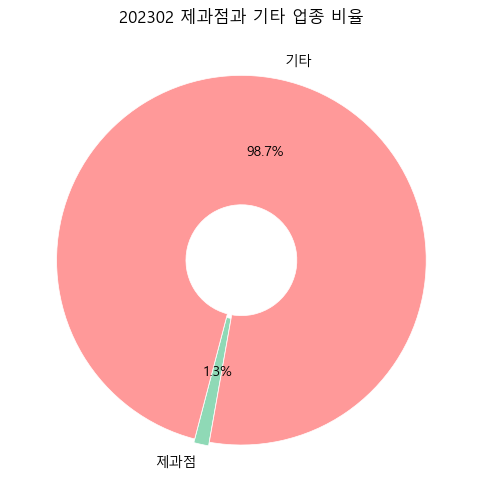

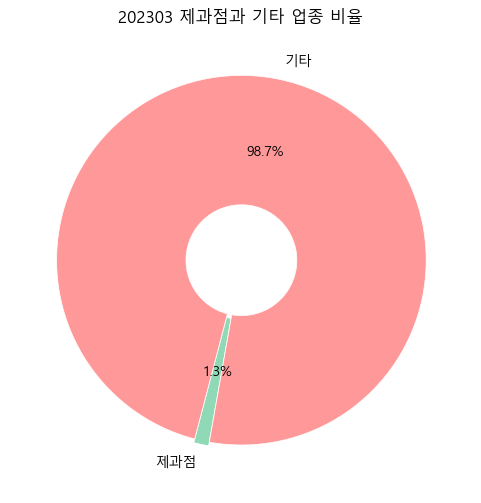

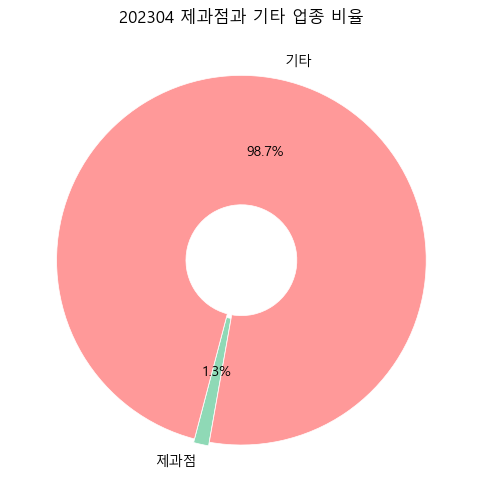

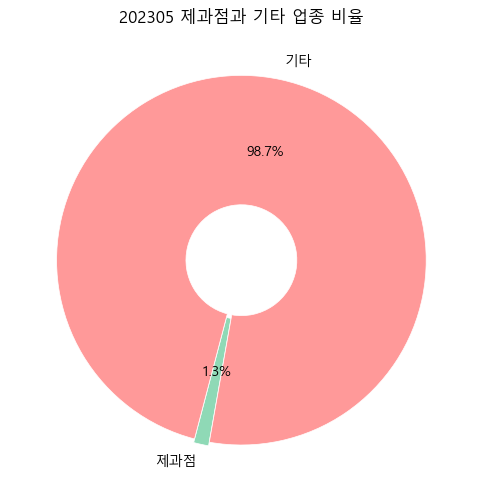

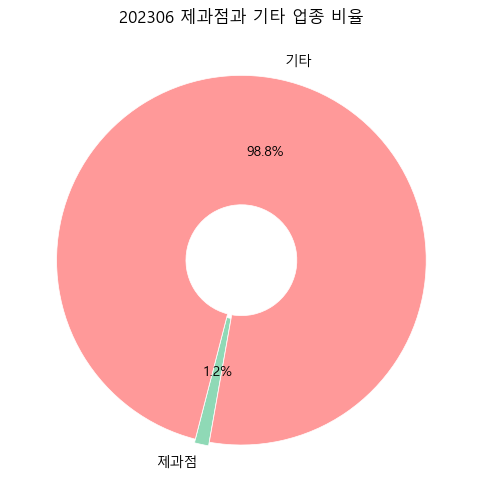

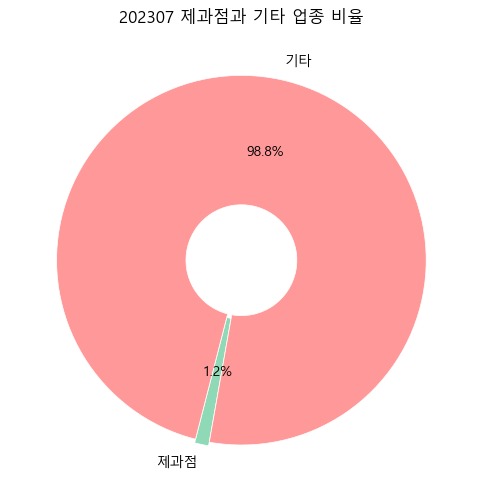

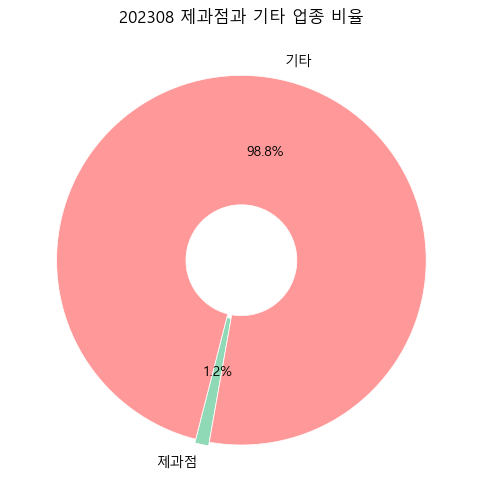

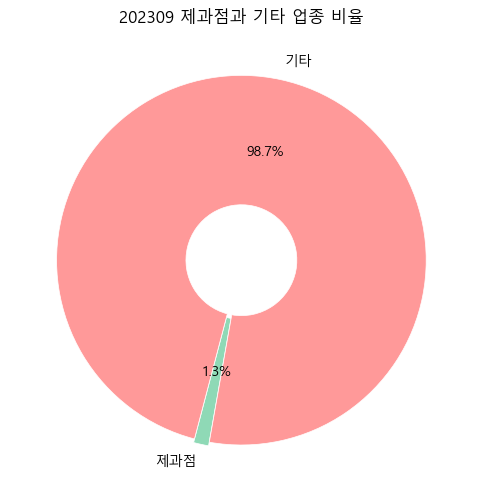

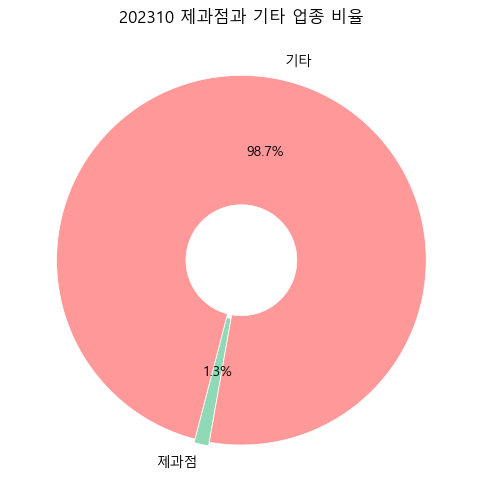

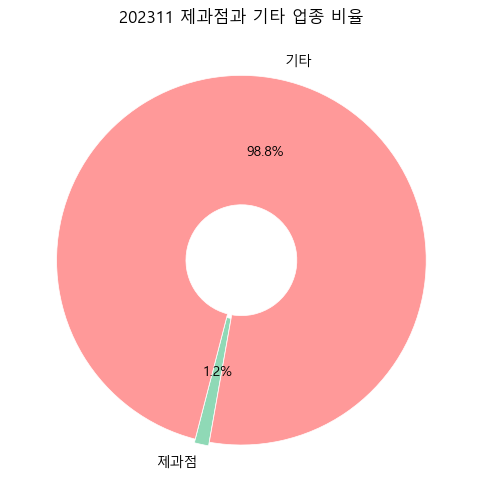

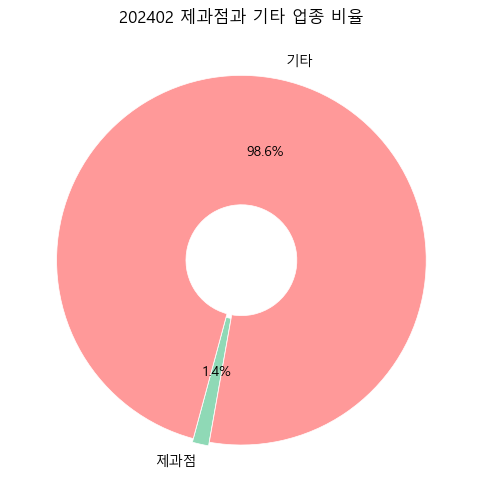

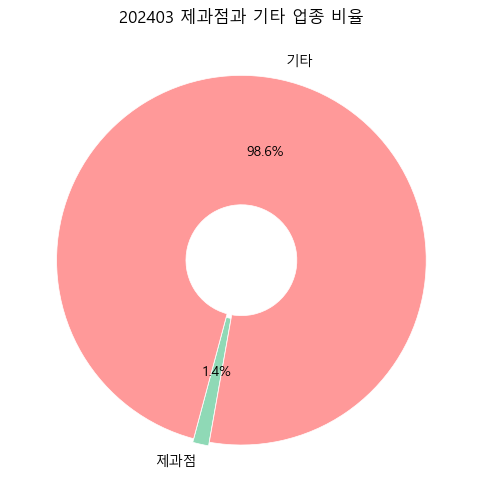

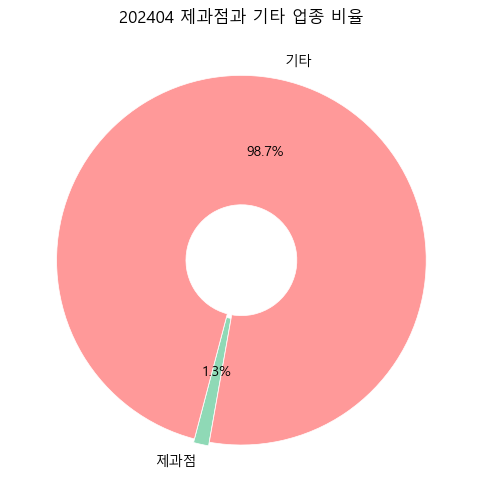

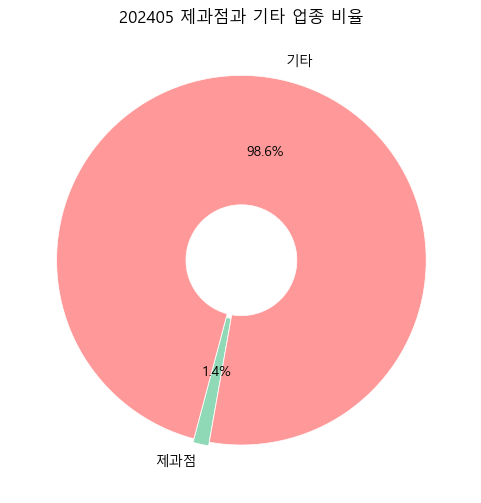

In [16]:
# 파이 그래프 설정
colors = ['#8fd9b6', '#ff9999']  # 제과점, 그 외 색상
explode = [0.01, 0.01]  # 그래프 요소의 강조
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 0.5}

# 기준연월 리스트
year_months = df_result['기준연월'].unique()

# 기준연월 별로 파이 그래프 그리기
for year_month in year_months:
    # 해당 연월의 데이터 추출
    year_month_data = df_result[df_result['기준연월'] == year_month]
    ratio = list(year_month_data['ratio'])
    labels = list(year_month_data['업종명'])

    # 파이 그래프 생성
    plt.figure(figsize=(6, 6))
    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False,
            explode=explode, colors=colors, wedgeprops=wedgeprops)
    plt.title(f'{year_month} 제과점과 기타 업종 비율')
    plt.show()

### 3. (제과점) 월별 이용건수, 이용금액
##### 이용건수

In [17]:
# df_b >> 업종명이 제과점인 데이터만 필터링 
df_b = df[df['업종명']=='제과점']
df_b.head(1)

,기준연월,시도명,시군구명,행정동명,행정동코드,업종코드,업종명,가맹점매출규모,이용건수(전체합계),이용금액(전체합계),...,충청남도고객이용건수,충청남도외고객이용건수,충청남도고객이용금액,충청남도외고객이용금액,내국인이용건수,외국인이용건수,내국인이용금액,외국인이용금액,기준_년,기준_월
29,201901,충청남도,천안시 동남구,광덕면,44131320,8301,제과점,A,6,170000,...,6.0,0.0,170000,0,6.0,0.0,170000,0,2019,1


In [18]:
df_mc = df_b.groupby(['기준_년', '기준_월'])['이용건수(전체합계)'].sum().to_frame().reset_index()

<Axes: xlabel='기준_년', ylabel='이용건수(전체합계)'>

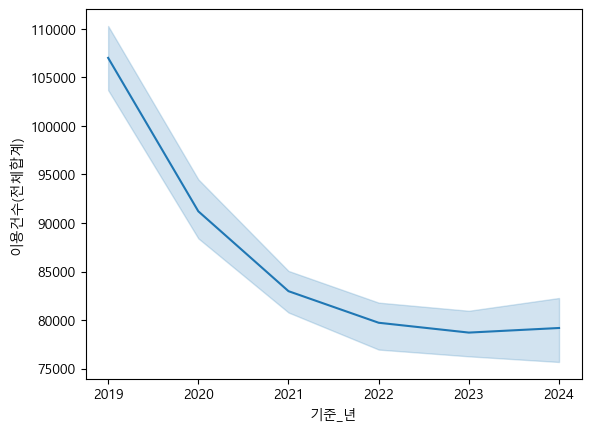

In [19]:
sns.lineplot(data=df_mc, x='기준_년', y='이용건수(전체합계)')

<Axes: xlabel='기준_월', ylabel='이용건수(전체합계)'>

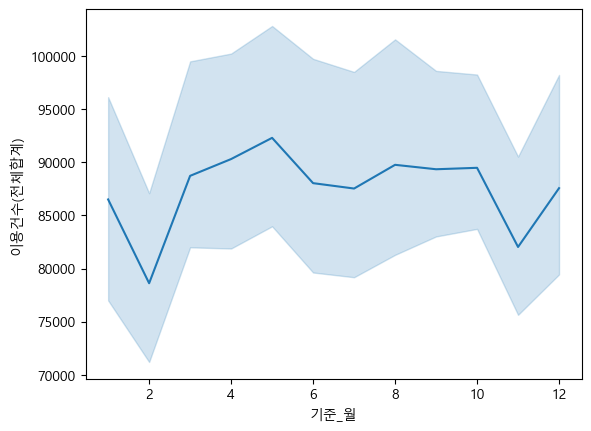

In [20]:
sns.lineplot(data=df_mc, x='기준_월', y='이용건수(전체합계)')

<Axes: xlabel='기준_월', ylabel='이용건수(전체합계)'>

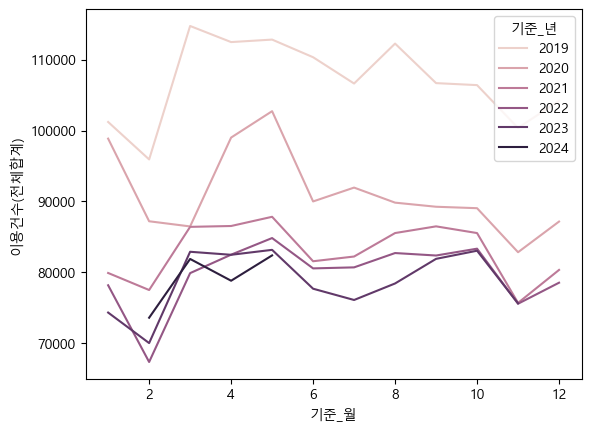

In [21]:
sns.lineplot(data=df_mc, x='기준_월', y='이용건수(전체합계)', hue='기준_년')

#### 이용금액

In [22]:
df_mm = df_b.groupby(['기준_년', '기준_월'])['이용금액(전체합계)'].sum().to_frame().reset_index()

<Axes: xlabel='기준_년', ylabel='이용금액(전체합계)'>

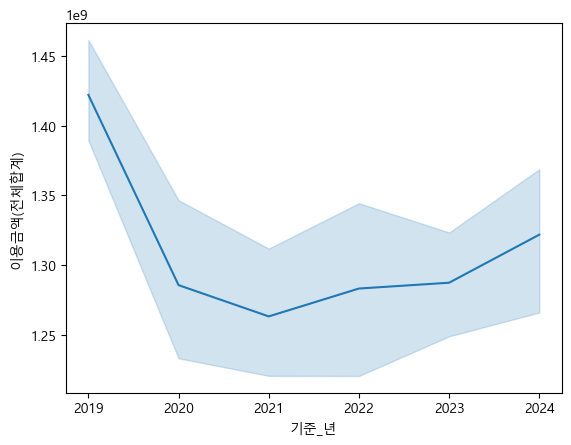

In [23]:
sns.lineplot(data=df_mm, x='기준_년', y='이용금액(전체합계)')

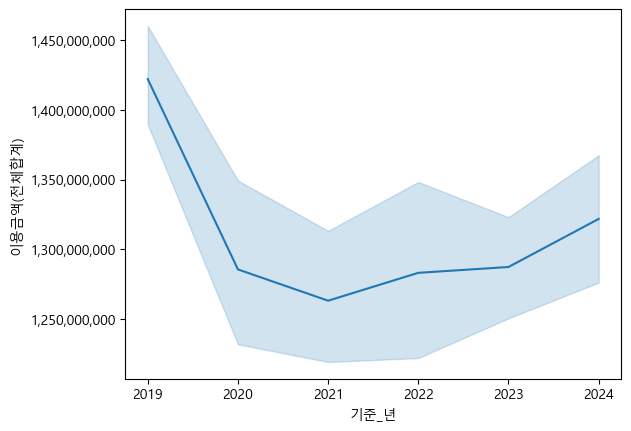

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# y축 전체 숫자 나오게
sns.lineplot(data=df_mm, x='기준_년', y='이용금액(전체합계)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

<Axes: xlabel='기준_월', ylabel='이용금액(전체합계)'>

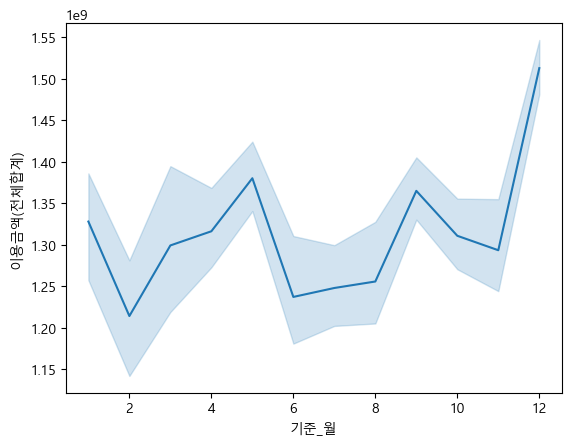

In [25]:
sns.lineplot(data=df_mm, x='기준_월', y='이용금액(전체합계)')

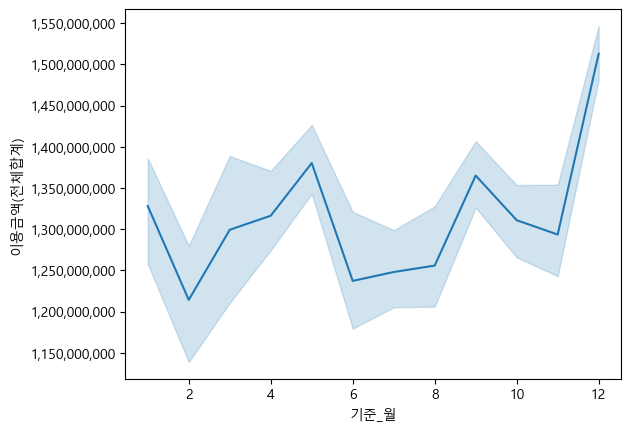

In [26]:
# y축 전체 숫자 나오게
sns.lineplot(data=df_mm, x='기준_월', y='이용금액(전체합계)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

<Axes: xlabel='기준_월', ylabel='이용금액(전체합계)'>

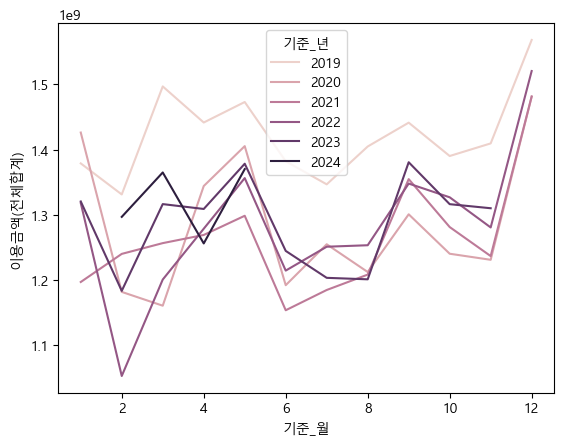

In [27]:
sns.lineplot(data=df_mm, x='기준_월', y='이용금액(전체합계)', hue='기준_년')

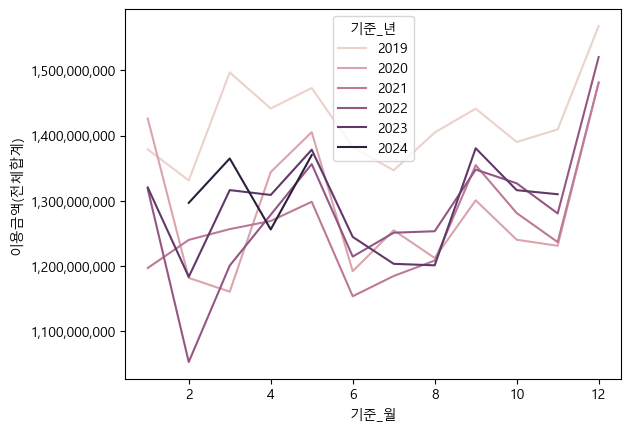

In [28]:
# y축 전체 숫자 나오게
sns.lineplot(data=df_mm, x='기준_월', y='이용금액(전체합계)', hue='기준_년')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

### 4. 기준연월 별 제과점 및 그 외 업종 비율 비교

In [29]:
grp2 = df.groupby(['기준_년', '업종명'])['이용금액(전체합계)'].mean().reset_index()
grp2

,기준_년,업종명,이용금액(전체합계)
0,2019,1급호텔,4.274746e+08
1,2019,2급호텔,6.646369e+06
2,2019,DVD음반테이프판매,2.520614e+06
3,2019,LPG,1.467790e+07
4,2019,가례서비스,2.115201e+07
...,...,...,...
1187,2024,화랑,4.378327e+06
1188,2024,화물운송,5.315356e+06
1189,2024,화방표구점,8.628549e+05
1190,2024,화원,3.199155e+06


C:\Users\LG\AppData\Local\Temp\ipykernel_1836\3490293978.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


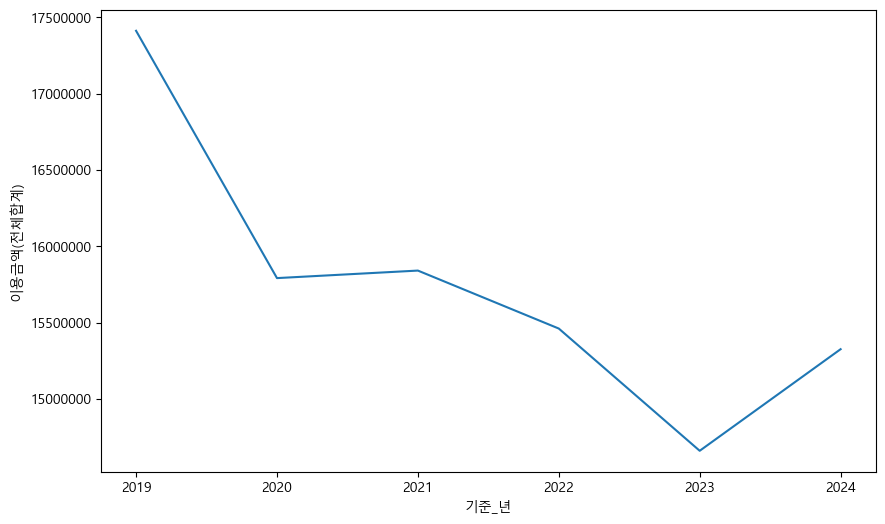

In [31]:
grp_b = grp2[grp2['업종명'] == '제과점']
plt.figure(figsize=(10,6))
sns.lineplot(data = grp_b , x='기준_년', y='이용금액(전체합계)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()